In [1]:
import pandas as pd
customers=pd.read_csv(r"C:\Users\user\Downloads\customers.csv")
transactions=pd.read_csv(r"C:\Users\user\Downloads\transactions.csv")


In [4]:
#merging using inner join
merge_df=pd.merge(customers,transactions, on='customer_id', how='inner')
merge_df.head()

,customer_id,name,age,city,transaction_id,date,amount,product_category
0,C001,Alice Smith,28,New York,T001,2024-07-01,120.5,Electronics
1,C001,Alice Smith,28,New York,T004,2024-07-04,220.0,Electronics
2,C001,Alice Smith,28,New York,T012,2024-07-12,40.0,Clothing
3,C002,Bob Johnson,35,Los Angeles,T002,2024-07-02,80.0,Groceries
4,C002,Bob Johnson,35,Los Angeles,T013,2024-07-13,180.0,Home


In [5]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20 non-null     object 
 1   name              20 non-null     object 
 2   age               20 non-null     int64  
 3   city              20 non-null     object 
 4   transaction_id    20 non-null     object 
 5   date              20 non-null     object 
 6   amount            20 non-null     float64
 7   product_category  20 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ KB


In [7]:
#group by same age and get total sales
age_summary=merge_df.groupby('age')['amount'].sum()
age_summary.info()


<class 'pandas.core.series.Series'>
Index: 10 entries, 22 to 45
Series name: amount
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [8]:
age_summary

age
22    105.0
24    180.0
27    115.0
28    380.5
29    345.0
30    400.0
33    180.0
35    260.0
41     35.0
45    275.0
Name: amount, dtype: float64

In [15]:
#aggreagte fuctions
city_summary=merge_df.groupby('city').agg({'city':'sum','amount':'sum'})

In [16]:
city_summary


,city,amount
city,,
Chicago,ChicagoChicagoChicagoChicago,380.0
Houston,HoustonHoustonHouston,215.0
Los Angeles,Los AngelesLos AngelesLos AngelesLos Angeles,605.0
New York,New YorkNew YorkNew YorkNew YorkNew York,495.5
Phoenix,PhoenixPhoenixPhoenixPhoenix,580.0


<Axes: title={'center': 'Total Amount by Age'}, xlabel='Age', ylabel='Amount'>

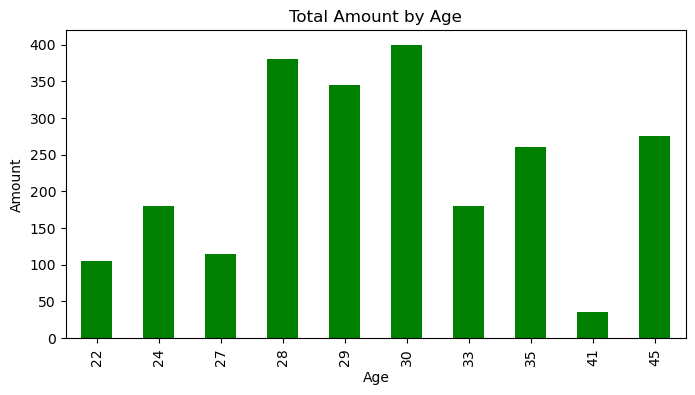

In [17]:
age_summary.plot(kind='bar', figsize=(8, 4), color='green', title='Total Amount by Age', xlabel='Age', ylabel='Amount')
